In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("ggplot")

# Create Dynamic Mode Decomposition Class for Later Usage

In [2]:
class DMD:
    def __init__(self, x1, x2):
        self.x1 = x1
        self.x2 = x2
        self.x0 = x1[:, 0]
        
        self.main()
        
    def main(self):
        self.svd_x1()
        self.get_atilde()
        self.get_eig_atilde()
        self.get_dmd()
       
    def svd_x1(self, thresh=0.7):
        u, s, vt = np.linalg.svd(self.x1)
        q = np.cumsum(s) / np.sum(s)
        mask = q > thresh
        r = np.where(mask)[0][0]

        self.u = u[:, :r]
        self.s = s[:r]
        self.vt = vt[:r, :]
        
    def get_atilde(self):
        self.atilde = self.u.T @ self.x2 @ self.vt.T @ np.diag(1/self.s)
             
    def get_eig_atilde(self):
        lamb, w = np.linalg.eig(self.atilde)
        self.lamb = lamb
        self.w = w
        
    def get_dmd(self):
        phi = self.x2 @ self.vt.T @ np.diag(1/self.s) @ self.w
        self.phi = phi
        
    def pred_item(self, t):
        
        at = self.phi @ np.linalg.matrix_power(np.diag(self.lamb), t) @ np.linalg.pinv(self.phi)
        xt = at @ self.x0.reshape(-1, 1)
        
        return np.real(xt)

# Example 1: Synthetic Data

((1000,), [<matplotlib.lines.Line2D at 0x1f4f009ac40>])

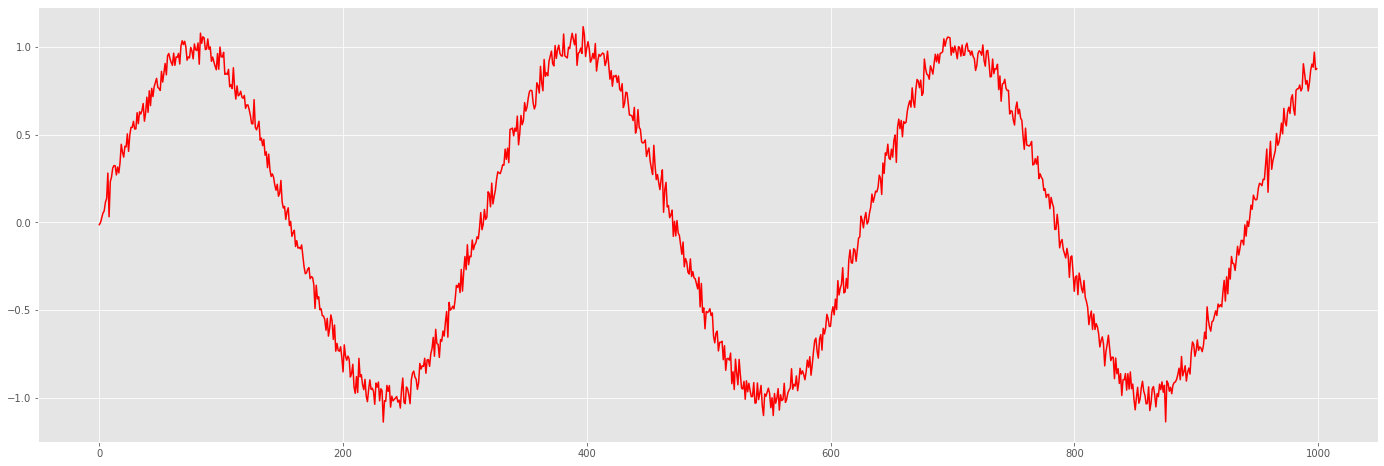

In [3]:
x = np.arange(1000)
y = np.sin(0.02*x) + 5e-2* np.random.randn(np.prod(x.shape))

figsize = (24, 8)
plt.figure(figsize=figsize)
y.shape, plt.plot(x, y, "r-")

In [4]:
k = 200

data = [y[start:start+k] for start in range(0, y.shape[0]-k)]
len(data)

800

In [5]:
tensor = np.matrix(data).T
x1 = tensor[:, :-1]
x2 = tensor[:, 1:]

tensor.shape, x1.shape, x2.shape

((200, 800), (200, 799), (200, 799))

In [6]:
dmd = DMD(x1, x2)

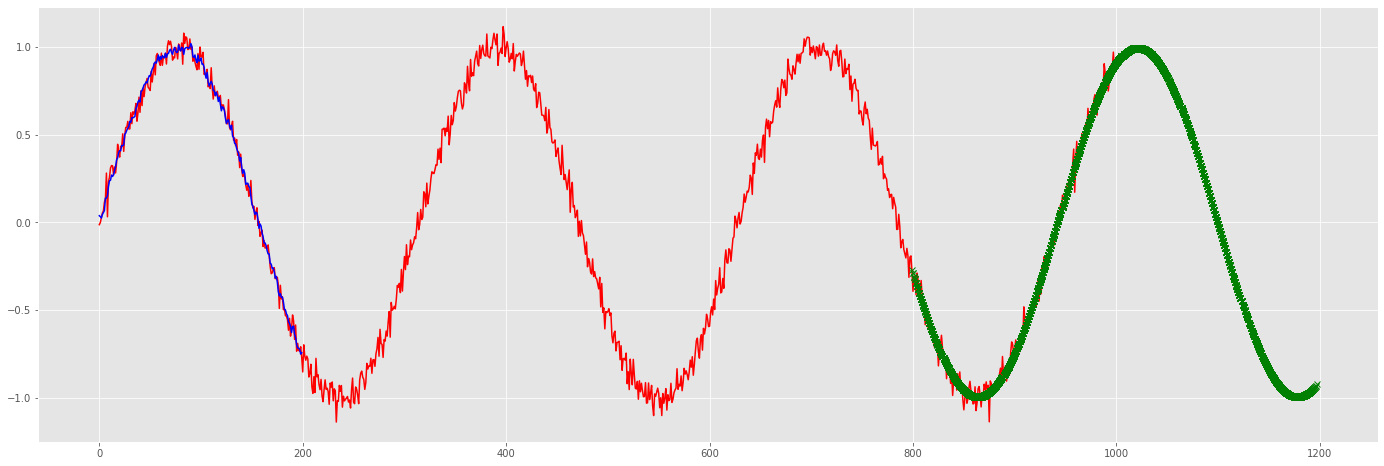

In [7]:
plt.figure(figsize=figsize)

plt.plot(y, "r")

pred = dmd.pred_item(0)
plt.plot(np.arange(0, 0+k), pred, "b")

for item in range(x1.shape[1], x1.shape[1]+200):
    pred = dmd.pred_item(item)
    plt.plot(np.arange(item, item+k), pred, "gx")

# Example 2: Temperature Data

In [8]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"
df = pd.read_csv(url)

df

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
...,...,...
3645,1990-12-27,14.0
3646,1990-12-28,13.6
3647,1990-12-29,13.5
3648,1990-12-30,15.7


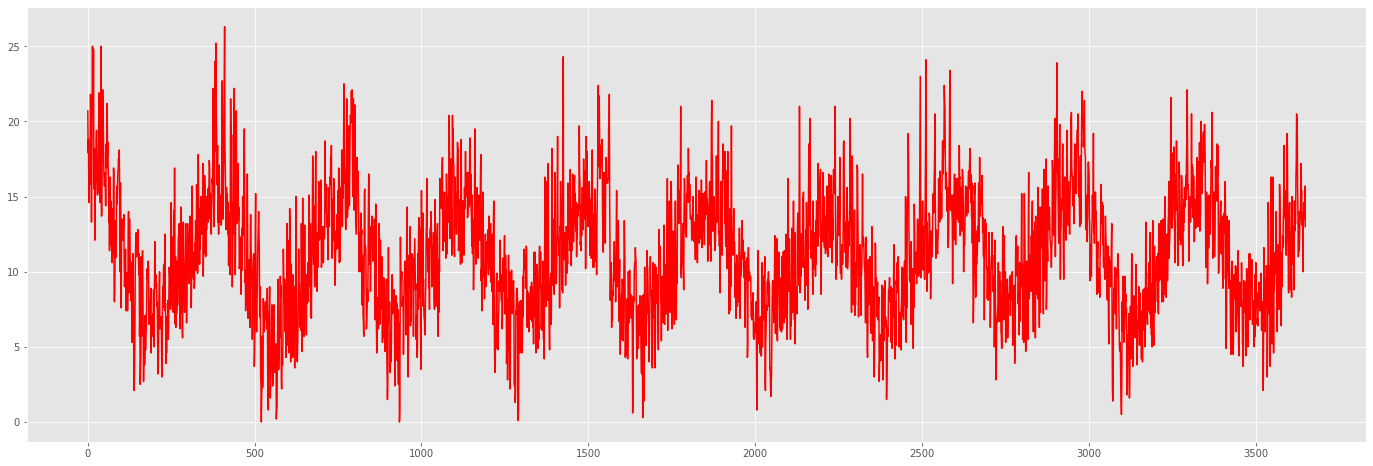

In [9]:
plt.figure(figsize=figsize)
plt.plot(df["Temp"], "r-")

In [10]:
y = df["Temp"].to_numpy()
y.shape

(3650,)

In [11]:
k = 1000

data = [y[start:start+k] for start in range(0, y.shape[0]-k)]
len(data)

2650

In [12]:
tensor = np.matrix(data).T
x1 = tensor[:, :-1]
x2 = tensor[:, 1:]

tensor.shape, x1.shape, x2.shape

((1000, 2650), (1000, 2649), (1000, 2649))

In [13]:
dmd = DMD(x1, x2)

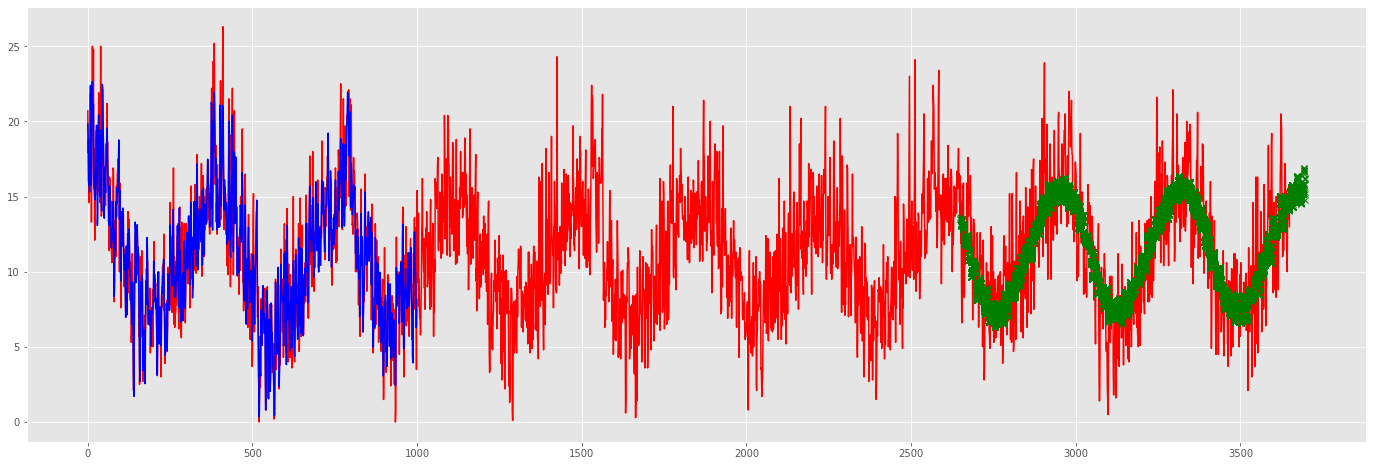

In [14]:
plt.figure(figsize=figsize)

plt.plot(y, "r")

pred = dmd.pred_item(0)
plt.plot(np.arange(0, 0+k), pred, "b")

for item in range(x1.shape[1], x1.shape[1]+50):
    pred = dmd.pred_item(item)
    plt.plot(np.arange(item, item+k), pred, "gx")